Background Reserach-

    What is humidity? - Humidity is a measure of the amount of water vapour in the air. Humidity depends on the temperature and pressure of the system of interest.

    What is temparature? - Temperature is a physical quantity that expresses hot and cold. Temperature Depends on Particle Movement!

    Wind Bearing- The direction where the wind is came.    

Difference between Temperature and Apparent Temperature:

    Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed.

Dataset Loading Process - 

In [93]:
from genericpath import isfile
import os

if os.path.isfile('weatherHistory.csv'):
    print('File Exists')
else:
    print('File does not exist')

File Exists


In [94]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer

In [95]:
weather_df = pd.read_csv('weatherHistory.csv')
weather_df.shape

(96453, 12)

In [96]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [97]:
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


(a). Preprocess the dataset as specified in the data mining process:

    First of all we need to remove Columns That Contain a Single Value (Unique value columns). 

In [98]:
print(weather_df.nunique())

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64


In [99]:
from numpy import unique

data = weather_df.to_numpy().astype(str)
for i in range(data.shape[1]):
    num = len(unique(data[:,i]))
    percentage = (float(num) / data.shape[0])* 100
    print('%s, %d, %.1f%%' % (weather_df.columns[i], num, percentage))

Formatted Date, 96429, 100.0%
Summary, 27, 0.0%
Precip Type, 3, 0.0%
Temperature (C), 7574, 7.9%
Apparent Temperature (C), 8984, 9.3%
Humidity, 90, 0.1%
Wind Speed (km/h), 2484, 2.6%
Wind Bearing (degrees), 360, 0.4%
Visibility (km), 949, 1.0%
Loud Cover, 1, 0.0%
Pressure (millibars), 4979, 5.2%
Daily Summary, 214, 0.2%


In [100]:
dropColumns = ['Formatted Date', 'Daily Summary', 'Loud Cover']
weather_df.drop(dropColumns, inplace=True, axis=1)
weather_df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [101]:
#calculates duplicates
duplicates = weather_df.duplicated()
#report if there are any duplicates
print(duplicates.any())
# list all duplicates rows
print(weather_df[duplicates])
#delete duplicate rows
weather_df.drop_duplicates(inplace=True)

True
                   Summary Precip Type  Temperature (C)  \
28410             Overcast        rain         7.222222   
28607  Breezy and Overcast        rain         1.666667   
28920        Mostly Cloudy        snow        -1.666667   
29472             Overcast        snow        -4.444444   
29473        Mostly Cloudy        snow        -5.333333   
...                    ...         ...              ...   
64544                Foggy        snow        -4.927778   
64545                Foggy        snow        -3.888889   
64546                Foggy        snow        -2.716667   
64547             Overcast        snow        -2.244444   
64548             Overcast        snow        -2.244444   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
28410                  7.222222      0.93             4.8300   
28607                 -4.177778      0.75            28.9800   
28920                 -4.105556      0.88             6.4400   
29472                 -8.96666

In [102]:
weather_df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [103]:
#Removing duplicates changes the indexes so we need to reset index
weather_df = weather_df.reset_index(drop=True)
weather_df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96376,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96377,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96378,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96379,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


I). Handle Missing Values and Outliers if any

Checking Missing values-

In [104]:
weather_df.isnull().values.any()

True

In [105]:
#Getting summary of null values
weather_df.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [106]:
weather_df[weather_df['Precip Type'].isna()]

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
52625,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163.0,9.982,1002.40
52627,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169.0,9.982,1001.79
52628,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151.0,9.982,1001.60
52630,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159.0,9.982,1001.92
52631,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197.0,16.100,1002.20
...,...,...,...,...,...,...,...,...,...
95512,Mostly Cloudy,NaN,8.322222,7.044444,0.85,8.0339,290.0,0.000,1021.73
95513,Mostly Cloudy,NaN,7.627778,6.183333,0.87,8.2271,293.0,0.000,1021.76
95514,Mostly Cloudy,NaN,7.111111,5.511111,0.89,8.5008,297.0,0.000,1021.81
95515,Partly Cloudy,NaN,6.672222,4.961111,0.90,8.6457,299.0,0.000,1021.83


In [107]:
# checking probability to drop/replace the missing values
(weather_df['Precip Type'].isna().sum() / len(weather_df))*100

0.5364127784521846

In [108]:
new_weather_df = weather_df.copy()
new_weather_df = new_weather_df.dropna(axis=0)
new_weather_df = new_weather_df.reset_index(drop=True)

In [109]:
new_weather_df.isnull().values.any()

False

Handling Outliers - Box Plots

<AxesSubplot:>

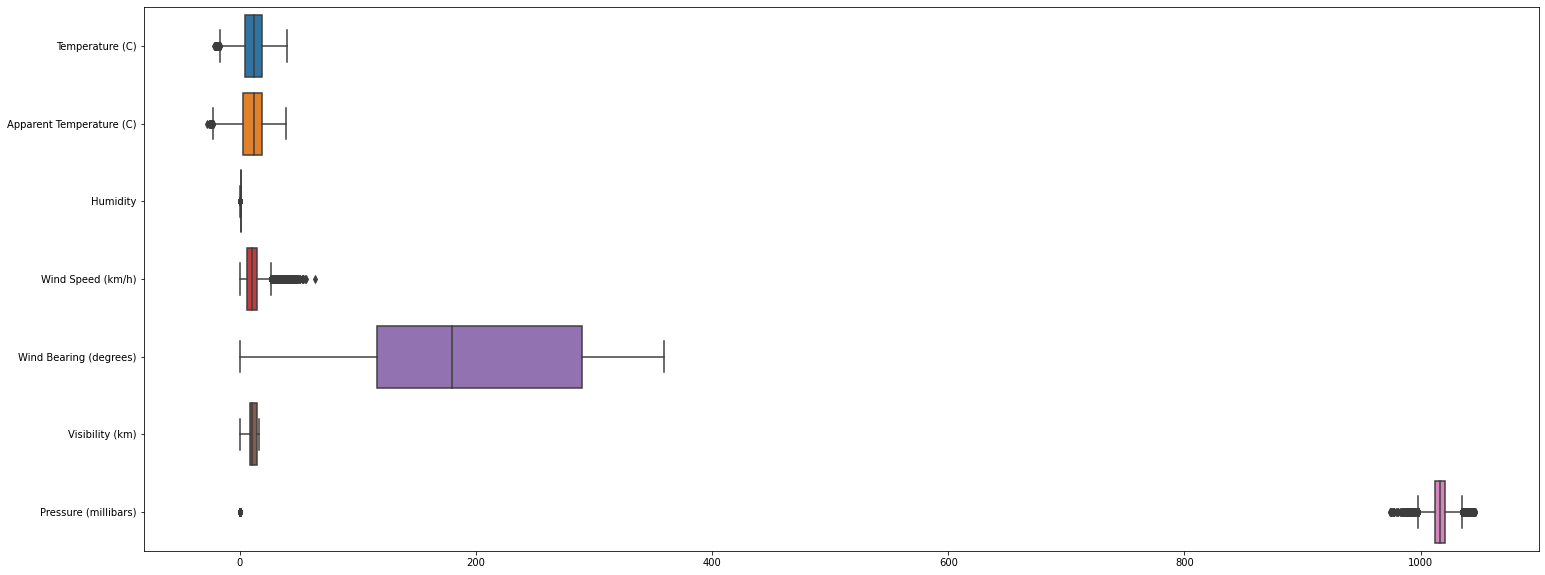

In [110]:
fig, ax = plt.subplots(figsize=(25,10))
sns.boxplot(data=new_weather_df, orient='h',ax=ax)

<AxesSubplot:>

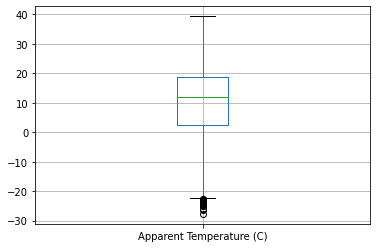

In [111]:
new_weather_df.boxplot(column=['Apparent Temperature (C)'])

<AxesSubplot:>

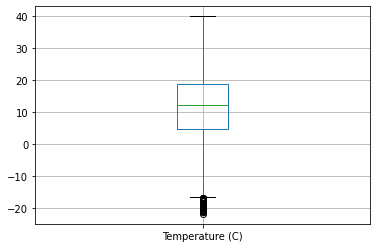

In [112]:
new_weather_df.boxplot(column=['Temperature (C)'])

<AxesSubplot:>

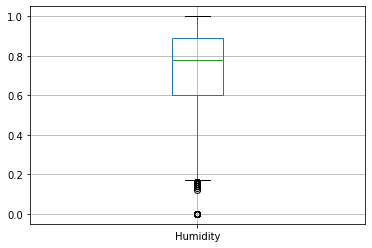

In [113]:
new_weather_df.boxplot(column=['Humidity'])

Before Shape:  (95864, 9)
After Shape:  (95842, 9)


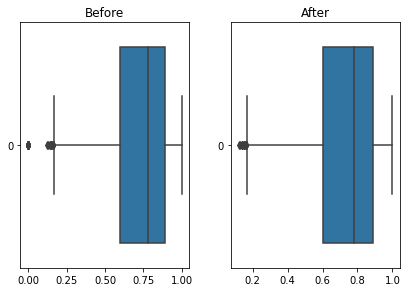

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
95837,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
95838,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
95839,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
95840,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [114]:
fig, axes = plt.subplots(1,2)
plt.tight_layout()

print('Before Shape: ', new_weather_df.shape)

new_weather_df2 = new_weather_df[(new_weather_df['Humidity']>0.0)]
print('After Shape: ', new_weather_df2.shape)

sns.boxplot(new_weather_df['Humidity'],orient='h',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(new_weather_df2['Humidity'],orient='h',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

new_weather_df = new_weather_df2
new_weather_df.reset_index(drop=True)

<AxesSubplot:>

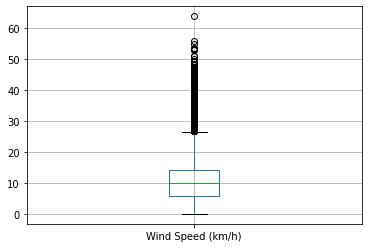

In [115]:
new_weather_df.boxplot(column=['Wind Speed (km/h)'])

Before shape: (95842, 9)
After shape:  (95841, 9)


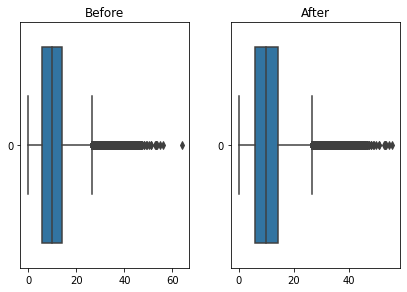

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
95836,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
95837,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
95838,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
95839,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [116]:
fig, axes = plt.subplots(1,2)
plt.tight_layout()

print('Before shape:', new_weather_df.shape)
new_weather_df2 = new_weather_df[(new_weather_df['Wind Speed (km/h)']<60)]
print('After shape: ', new_weather_df2.shape)

sns.boxplot(new_weather_df['Wind Speed (km/h)'], orient='h', ax=axes[0])
axes[0].set_title('Before')
sns.boxplot(new_weather_df2['Wind Speed (km/h)'], orient='h', ax=axes[1])
axes[1].set_title('After')
plt.show()

new_weather_df = new_weather_df2
new_weather_df.reset_index(drop=True)

<AxesSubplot:>

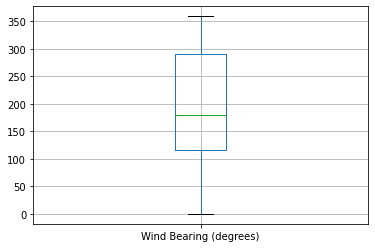

In [117]:
new_weather_df.boxplot(column=['Wind Bearing (degrees)'])

<AxesSubplot:>

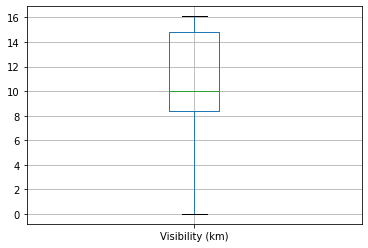

In [118]:
new_weather_df.boxplot(column=['Visibility (km)'])

<AxesSubplot:>

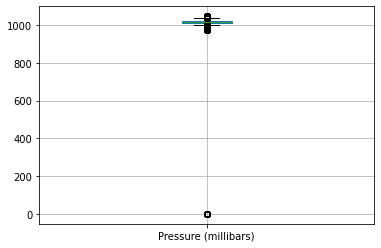

In [119]:
new_weather_df.boxplot(column=['Pressure (millibars)'])

Before shape: (95841, 9)
After shape:  (94556, 9)


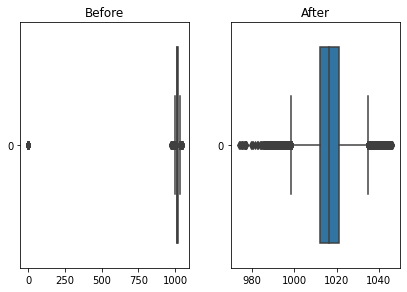

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
94551,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
94552,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
94553,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
94554,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [120]:
fig, axes = plt.subplots(1,2)
plt.tight_layout()

print('Before shape:', new_weather_df.shape)
new_weather_df2 = new_weather_df[(new_weather_df['Pressure (millibars)']>800)]
print('After shape: ', new_weather_df2.shape)

sns.boxplot(new_weather_df['Pressure (millibars)'], orient='h', ax=axes[0])
axes[0].set_title('Before')
sns.boxplot(new_weather_df2['Pressure (millibars)'], orient='h', ax=axes[1])
axes[1].set_title('After')
plt.show()

new_weather_df = new_weather_df2
new_weather_df.reset_index(drop=True)

<AxesSubplot:>

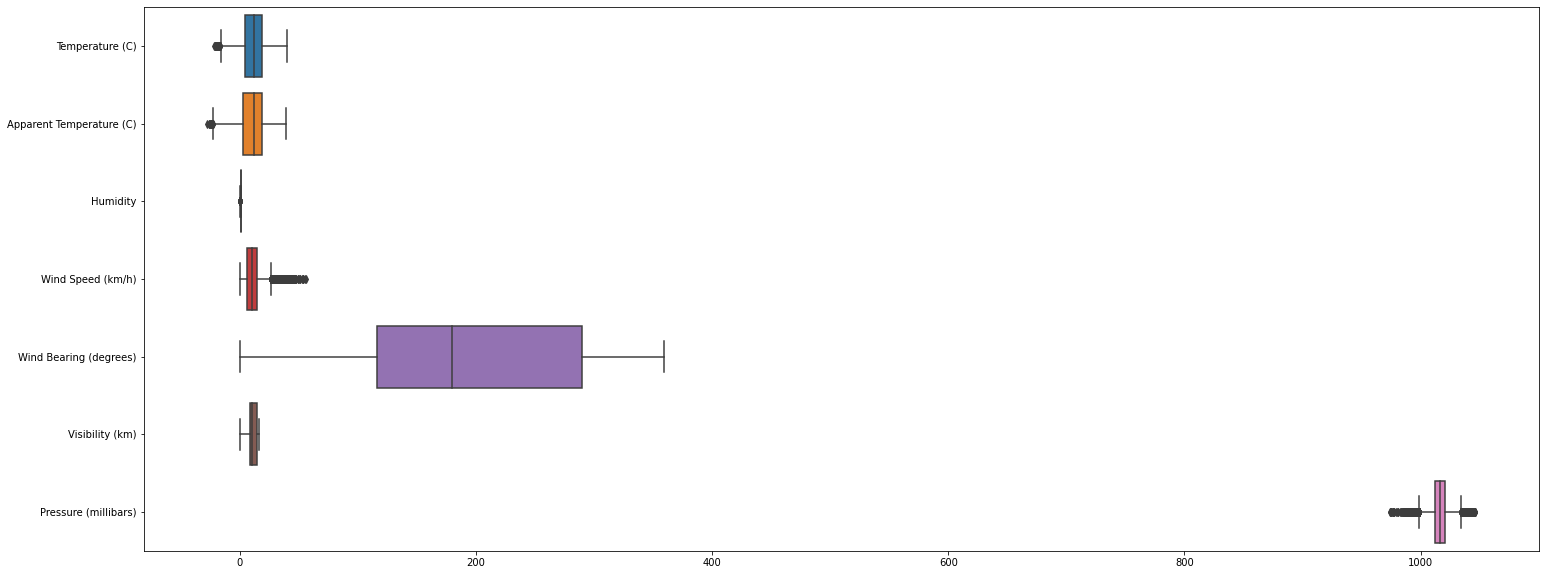

In [121]:
fig, ax = plt.subplots(figsize=(25,10))
sns.boxplot(data=new_weather_df, orient='h', ax=ax)

Splitting data into train and test sets

In [122]:
features_df = new_weather_df.drop('Apparent Temperature (C)',1)
features_df = features_df.reset_index(drop=True)
features_df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
94551,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36
94552,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16
94553,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66
94554,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [123]:
y = pd.DataFrame(new_weather_df['Apparent Temperature (C)'], columns=["Apparent Temperature (C)"])
y = y.reset_index(drop=True)
y

,Apparent Temperature (C)
0,7.388889
1,7.227778
2,9.377778
3,5.944444
4,6.977778
...,...
94551,26.016667
94552,24.583333
94553,22.038889
94554,21.522222


In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df,y, test_size=0.2, random_state=3)

In [125]:
X_test = X_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [126]:
X_train

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Overcast,rain,2.194444,0.89,10.8675,81.0,5.9731,1024.60
1,Breezy,rain,0.994444,0.73,38.2697,289.0,15.8263,1016.28
2,Mostly Cloudy,rain,20.833333,0.69,10.7870,129.0,15.1340,1019.29
3,Overcast,snow,-2.338889,0.82,7.9051,291.0,6.0214,1013.77
4,Overcast,rain,2.727778,0.84,16.2932,18.0,10.1430,1017.17
...,...,...,...,...,...,...,...,...
75639,Partly Cloudy,rain,27.733333,0.53,3.6386,53.0,11.2056,1019.12
75640,Mostly Cloudy,rain,10.944444,0.95,5.6833,178.0,11.2539,1014.06
75641,Partly Cloudy,rain,24.027778,0.52,13.2825,173.0,15.5526,1018.05
75642,Overcast,rain,7.066667,0.95,12.3326,303.0,8.0500,1004.01


II). Produce Q-Q Plots and Histograms of the features, and apply the transformations if required.

        Q-Q Plots and Histograms

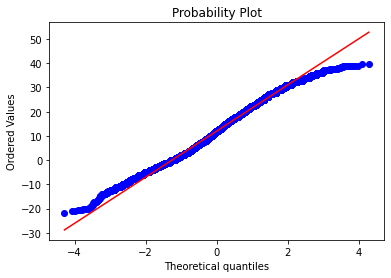

<AxesSubplot:>

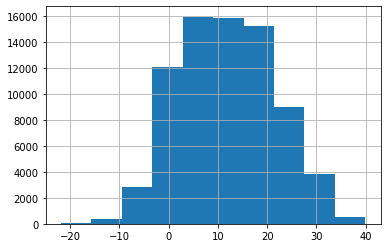

In [127]:
# Temperature (C) - Training
stats.probplot(X_train['Temperature (C)'], dist="norm", plot=plt)
plt.show()
X_train['Temperature (C)'].hist()

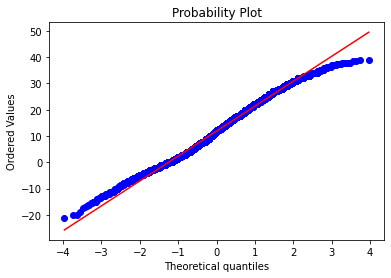

<AxesSubplot:>

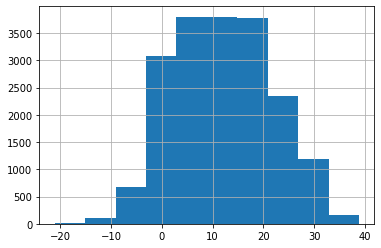

In [128]:
# Temperature (C) - Testing
stats.probplot(X_test['Temperature (C)'], dist="norm", plot=plt)
plt.show()
X_test['Temperature (C)'].hist()

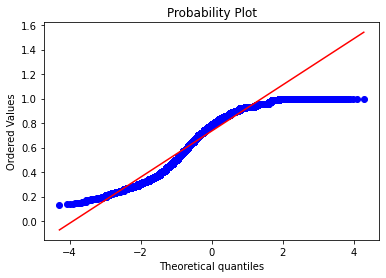

<AxesSubplot:>

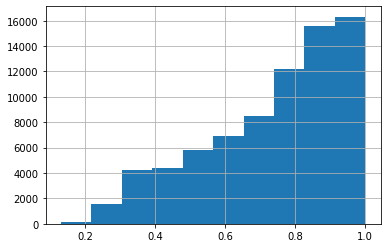

In [129]:
# Humidity - Training
stats.probplot(X_train['Humidity'], dist="norm", plot=plt)
plt.show()
X_train['Humidity'].hist()

In [130]:
# Clearly column variables are left skewed so this need transformation

columns = ['Humidity']

exp_transform = FunctionTransformer(lambda x:x**3, validate=True)
data_new = exp_transform.transform(X_train[columns])
df_new = pd.DataFrame(data_new, columns=columns)

X_train.Humidity = df_new['Humidity']

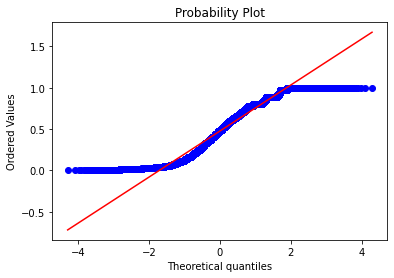

<AxesSubplot:>

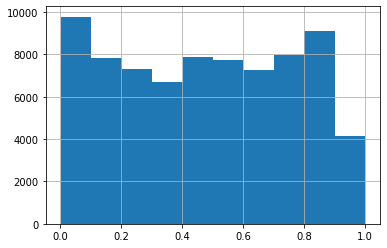

In [131]:
stats.probplot(X_train["Humidity"], dist="norm", plot=plt)
plt.show()
X_train['Humidity'].hist()

In [132]:
columns = ['Humidity']

exp_transform = FunctionTransformer(lambda x:x**3, validate=True)
data_new = exp_transform.transform(X_test[columns])
df_new = pd.DataFrame(data_new, columns=columns)

X_test.Humidity = df_new['Humidity']

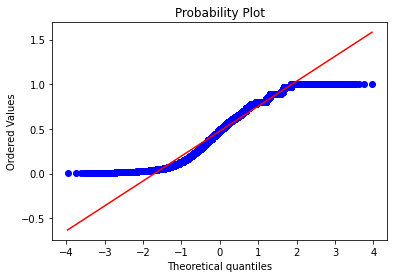

<AxesSubplot:>

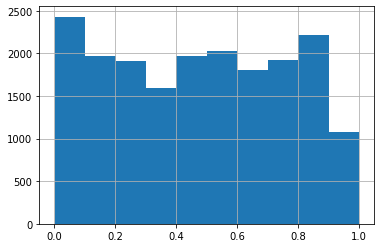

In [133]:
stats.probplot(X_test["Humidity"], dist="norm", plot=plt)
plt.show()
X_test['Humidity'].hist()

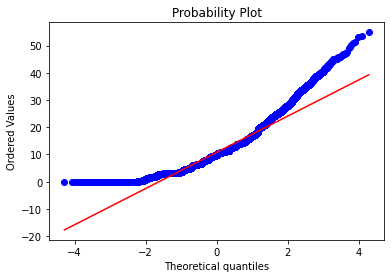

<AxesSubplot:>

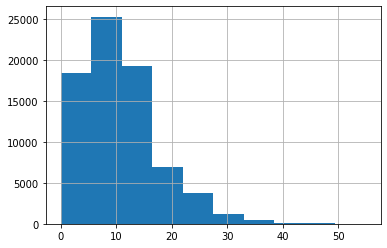

In [134]:
# Wind Speed (km/h) - Training
stats.probplot(X_train['Wind Speed (km/h)'], dist='norm', plot=plt)
plt.show()
X_train['Wind Speed (km/h)'].hist()

In [135]:
X_train['Wind Speed (km/h)'].min()

0.0

In [136]:
columns = ['Wind Speed (km/h)']

log_transform = FunctionTransformer(np.log1p, validate= True)
data_new = log_transform.transform(X_train[columns])

new_df = pd.DataFrame(data_new, columns=columns)

X_train['Wind Speed (km/h)'] = new_df['Wind Speed (km/h)']

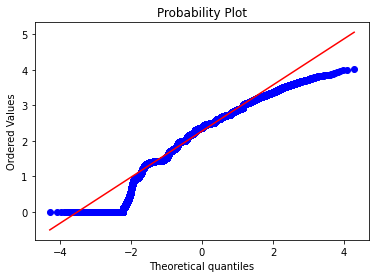

<AxesSubplot:>

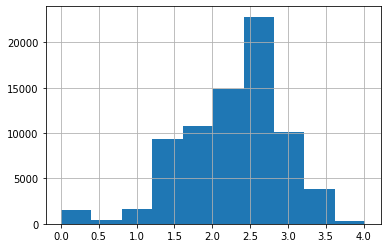

In [137]:
stats.probplot(X_train['Wind Speed (km/h)'], dist='norm', plot=plt)
plt.show()
X_train['Wind Speed (km/h)'].hist()

In [138]:
columns = ['Wind Speed (km/h)']

log_transform = FunctionTransformer(np.log1p, validate= True)
data_new = log_transform.transform(X_test[columns])

new_df = pd.DataFrame(data_new, columns=columns)

X_test['Wind Speed (km/h)'] = new_df['Wind Speed (km/h)']

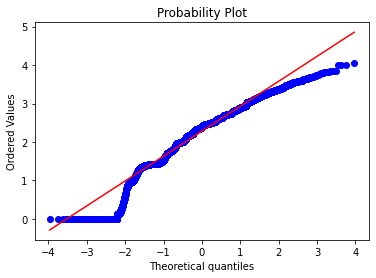

<AxesSubplot:>

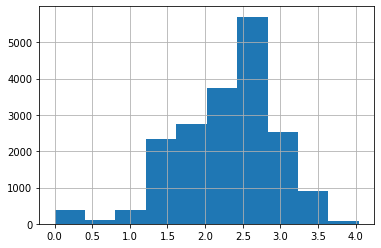

In [139]:
stats.probplot(X_test['Wind Speed (km/h)'], dist='norm', plot=plt)
plt.show()
X_test['Wind Speed (km/h)'].hist()

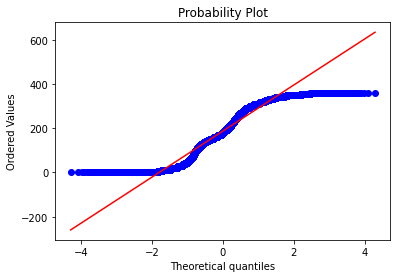

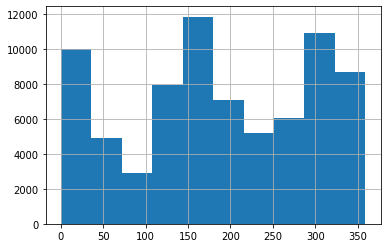

In [140]:
stats.probplot(X_train["Wind Bearing (degrees)"], dist="norm", plot=plt)
plt.show();
X_train["Wind Bearing (degrees)"].hist();

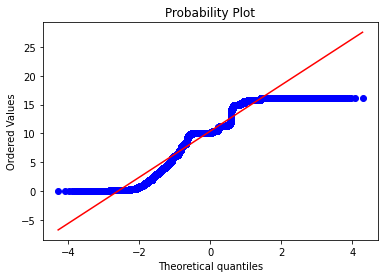

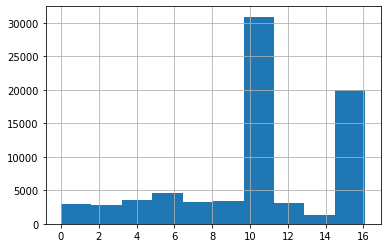

In [141]:
stats.probplot(X_train["Visibility (km)"], dist="norm", plot=plt)
plt.show();
X_train["Visibility (km)"].hist();

<AxesSubplot:>

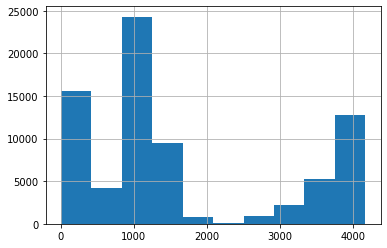

In [142]:
columns = ['Visibility (km)']

# create the function transformer object with exponentioal transformation
exp_transformer2 = FunctionTransformer(lambda x:x**3, validate=True)

# apply the transformation 
data_new = exp_transformer2.transform(X_train[columns])

new_df = pd.DataFrame(data_new, columns=columns)

X_train['Visibility (km)'] = new_df['Visibility (km)']
X_train['Visibility (km)'].hist()


<AxesSubplot:>

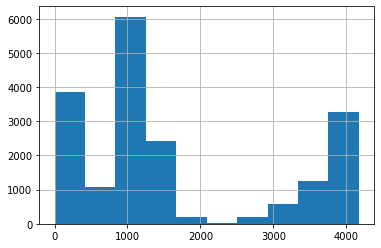

In [143]:
columns = ['Visibility (km)']

# create the function transformer object with exponentioal transformation
exp_transformer2 = FunctionTransformer(lambda x:x**3, validate=True)

# apply the transformation 
data_new = exp_transformer2.transform(X_test[columns])

new_df = pd.DataFrame(data_new, columns=columns)

X_test['Visibility (km)'] = new_df['Visibility (km)']
X_test['Visibility (km)'].hist()


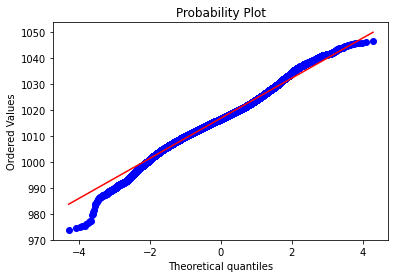

<AxesSubplot:>

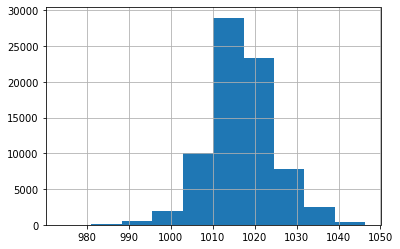

In [144]:
stats.probplot(X_train["Pressure (millibars)"], dist="norm", plot=plt)
plt.show()
X_train["Pressure (millibars)"].hist()

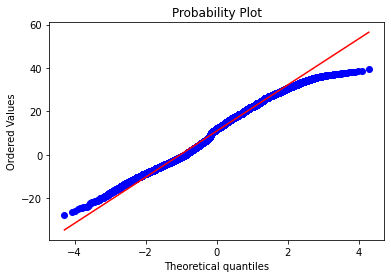

<AxesSubplot:>

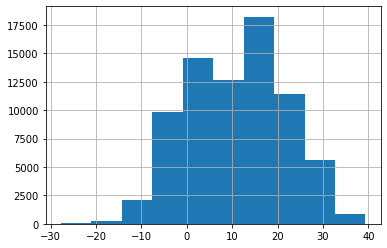

In [145]:
stats.probplot(y_train["Apparent Temperature (C)"], dist="norm", plot=plt)
plt.show()
y_train["Apparent Temperature (C)"].hist()

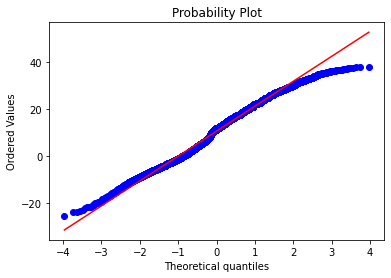

<AxesSubplot:>

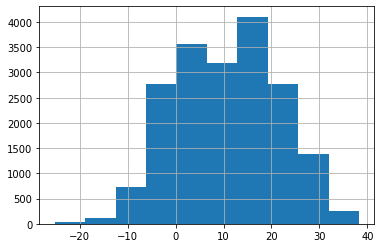

In [146]:
stats.probplot(y_test["Apparent Temperature (C)"], dist="norm", plot=plt)
plt.show()
y_test["Apparent Temperature (C)"].hist()

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>],
       [<AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>]],
      dtype=object)

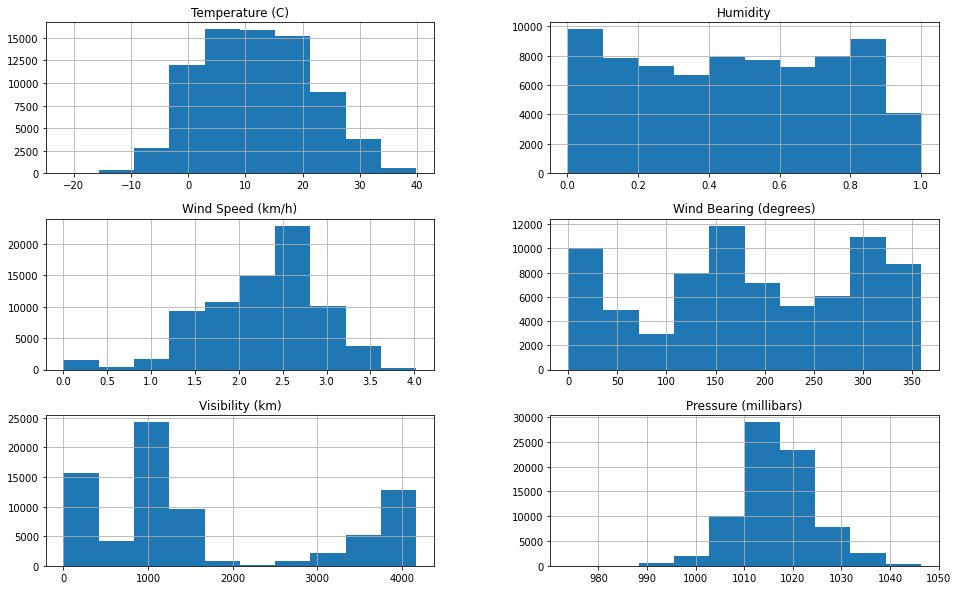

In [147]:
X_train.hist(figsize=(16,10))

III). If it is required, apply suitable feature coding techniques.
    
    We applied data coding for categorical data. Here we can find categorical data coloumns -> Summary and Percip Type

In [148]:
X_train

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Overcast,rain,2.194444,0.704969,2.473804,81.0,213.107806,1024.60
1,Breezy,rain,0.994444,0.389017,3.670453,289.0,3964.041400,1016.28
2,Mostly Cloudy,rain,20.833333,0.328509,2.466997,129.0,3466.260426,1019.29
3,Overcast,snow,-2.338889,0.551368,2.186624,291.0,218.319453,1013.77
4,Overcast,rain,2.727778,0.592704,2.850313,18.0,1043.516394,1017.17
...,...,...,...,...,...,...,...,...
75639,Partly Cloudy,rain,27.733333,0.148877,1.534413,53.0,1407.036446,1019.12
75640,Mostly Cloudy,rain,10.944444,0.857375,1.899612,178.0,1425.309420,1014.06
75641,Partly Cloudy,rain,24.027778,0.140608,2.659035,173.0,3761.915250,1018.05
75642,Overcast,rain,7.066667,0.857375,2.590212,303.0,521.660125,1004.01


In [149]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(X_train[['Summary']])
colnames = enc.get_feature_names()
enc_df = pd.DataFrame(enc.transform(X_train[['Summary']]).toarray(), columns=colnames)

enc_df_test = pd.DataFrame(enc.transform(X_test[['Summary']]).toarray(), columns=colnames)

X_train = X_train.join(enc_df)
X_test = X_test.join(enc_df_test)


In [150]:
X_train

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_Breezy,x0_Breezy and Dry,...,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,Overcast,rain,2.194444,0.704969,2.473804,81.0,213.107806,1024.60,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Breezy,rain,0.994444,0.389017,3.670453,289.0,3964.041400,1016.28,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mostly Cloudy,rain,20.833333,0.328509,2.466997,129.0,3466.260426,1019.29,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Overcast,snow,-2.338889,0.551368,2.186624,291.0,218.319453,1013.77,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Overcast,rain,2.727778,0.592704,2.850313,18.0,1043.516394,1017.17,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75639,Partly Cloudy,rain,27.733333,0.148877,1.534413,53.0,1407.036446,1019.12,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75640,Mostly Cloudy,rain,10.944444,0.857375,1.899612,178.0,1425.309420,1014.06,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75641,Partly Cloudy,rain,24.027778,0.140608,2.659035,173.0,3761.915250,1018.05,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75642,Overcast,rain,7.066667,0.857375,2.590212,303.0,521.660125,1004.01,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
X_train['Precip Type']=X_train['Precip Type'].astype('category')
X_train['Precip Type']=X_train['Precip Type'].cat.codes
X_train.dtypes
X_train

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_Breezy,x0_Breezy and Dry,...,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,Overcast,0,2.194444,0.704969,2.473804,81.0,213.107806,1024.60,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Breezy,0,0.994444,0.389017,3.670453,289.0,3964.041400,1016.28,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mostly Cloudy,0,20.833333,0.328509,2.466997,129.0,3466.260426,1019.29,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Overcast,1,-2.338889,0.551368,2.186624,291.0,218.319453,1013.77,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Overcast,0,2.727778,0.592704,2.850313,18.0,1043.516394,1017.17,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75639,Partly Cloudy,0,27.733333,0.148877,1.534413,53.0,1407.036446,1019.12,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75640,Mostly Cloudy,0,10.944444,0.857375,1.899612,178.0,1425.309420,1014.06,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75641,Partly Cloudy,0,24.027778,0.140608,2.659035,173.0,3761.915250,1018.05,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75642,Overcast,0,7.066667,0.857375,2.590212,303.0,521.660125,1004.01,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
X_test['Precip Type']=X_test['Precip Type'].astype('category')
X_test['Precip Type']=X_test['Precip Type'].cat.codes
X_test.dtypes
X_test

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_Breezy,x0_Breezy and Dry,...,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,Clear,0,21.111111,0.314432,2.006871,170.0,4173.281000,1013.30,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Partly Cloudy,0,24.844444,0.262144,2.824855,338.0,4173.281000,1011.78,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Overcast,0,1.183333,0.778688,0.895680,190.0,112.678587,1035.20,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Partly Cloudy,0,17.361111,0.405224,1.740677,147.0,1407.036446,1019.44,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Mostly Cloudy,0,18.405556,0.729000,2.075848,306.0,2873.159519,1019.32,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18907,Partly Cloudy,0,20.072222,0.216000,2.511086,152.0,4173.281000,1015.76,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18908,Overcast,0,14.972222,0.074088,3.286908,319.0,1407.036446,1014.30,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18909,Foggy,0,3.866667,0.884736,1.439835,40.0,28.624534,1039.34,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18910,Overcast,0,6.177778,0.970299,3.038959,59.0,194.708598,1005.94,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
X_train.drop('Summary', inplace=True, axis=1)
X_train

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,...,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,0,2.194444,0.704969,2.473804,81.0,213.107806,1024.60,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.994444,0.389017,3.670453,289.0,3964.041400,1016.28,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,20.833333,0.328509,2.466997,129.0,3466.260426,1019.29,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,-2.338889,0.551368,2.186624,291.0,218.319453,1013.77,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2.727778,0.592704,2.850313,18.0,1043.516394,1017.17,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75639,0,27.733333,0.148877,1.534413,53.0,1407.036446,1019.12,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75640,0,10.944444,0.857375,1.899612,178.0,1425.309420,1014.06,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75641,0,24.027778,0.140608,2.659035,173.0,3761.915250,1018.05,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75642,0,7.066667,0.857375,2.590212,303.0,521.660125,1004.01,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
X_test.drop('Summary', inplace=True, axis=1)

#Final testing Dataframe
X_test

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,...,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,0,21.111111,0.314432,2.006871,170.0,4173.281000,1013.30,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,24.844444,0.262144,2.824855,338.0,4173.281000,1011.78,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.183333,0.778688,0.895680,190.0,112.678587,1035.20,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,17.361111,0.405224,1.740677,147.0,1407.036446,1019.44,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,18.405556,0.729000,2.075848,306.0,2873.159519,1019.32,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18907,0,20.072222,0.216000,2.511086,152.0,4173.281000,1015.76,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18908,0,14.972222,0.074088,3.286908,319.0,1407.036446,1014.30,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18909,0,3.866667,0.884736,1.439835,40.0,28.624534,1039.34,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18910,0,6.177778,0.970299,3.038959,59.0,194.708598,1005.94,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


IV). Scale and/or standardized the features, produce relevant graphs to show the scaling/ standardizing effect.


In [155]:
X_train.describe().loc[['min','max']]

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,...,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
min,0.0,-21.822222,0.002197,0.000000,0.0,0.000,973.78,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,39.905556,1.000000,4.023294,359.0,4173.281,1046.38,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [156]:
to_standardize_train = X_train[['Temperature (C)', 'Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']].copy()
to_standardize_train

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,2.194444,0.704969,2.473804,213.107806,1024.60
1,0.994444,0.389017,3.670453,3964.041400,1016.28
2,20.833333,0.328509,2.466997,3466.260426,1019.29
3,-2.338889,0.551368,2.186624,218.319453,1013.77
4,2.727778,0.592704,2.850313,1043.516394,1017.17
...,...,...,...,...,...
75639,27.733333,0.148877,1.534413,1407.036446,1019.12
75640,10.944444,0.857375,1.899612,1425.309420,1014.06
75641,24.027778,0.140608,2.659035,3761.915250,1018.05
75642,7.066667,0.857375,2.590212,521.660125,1004.01


In [157]:
to_standardize_test = X_test[['Temperature (C)', 'Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']].copy()
to_standardize_test

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,21.111111,0.314432,2.006871,4173.281000,1013.30
1,24.844444,0.262144,2.824855,4173.281000,1011.78
2,1.183333,0.778688,0.895680,112.678587,1035.20
3,17.361111,0.405224,1.740677,1407.036446,1019.44
4,18.405556,0.729000,2.075848,2873.159519,1019.32
...,...,...,...,...,...
18907,20.072222,0.216000,2.511086,4173.281000,1015.76
18908,14.972222,0.074088,3.286908,1407.036446,1014.30
18909,3.866667,0.884736,1.439835,28.624534,1039.34
18910,6.177778,0.970299,3.038959,194.708598,1005.94


array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>],
       [<AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>]], dtype=object)

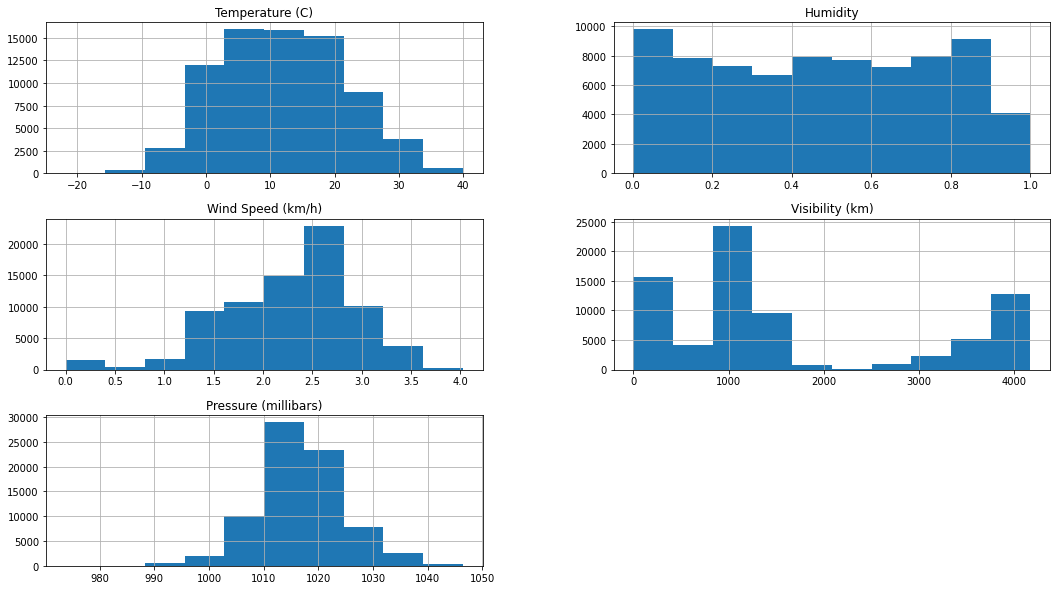

In [158]:
to_standardize_train.hist(figsize=(18,10))

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>],
       [<AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>]], dtype=object)

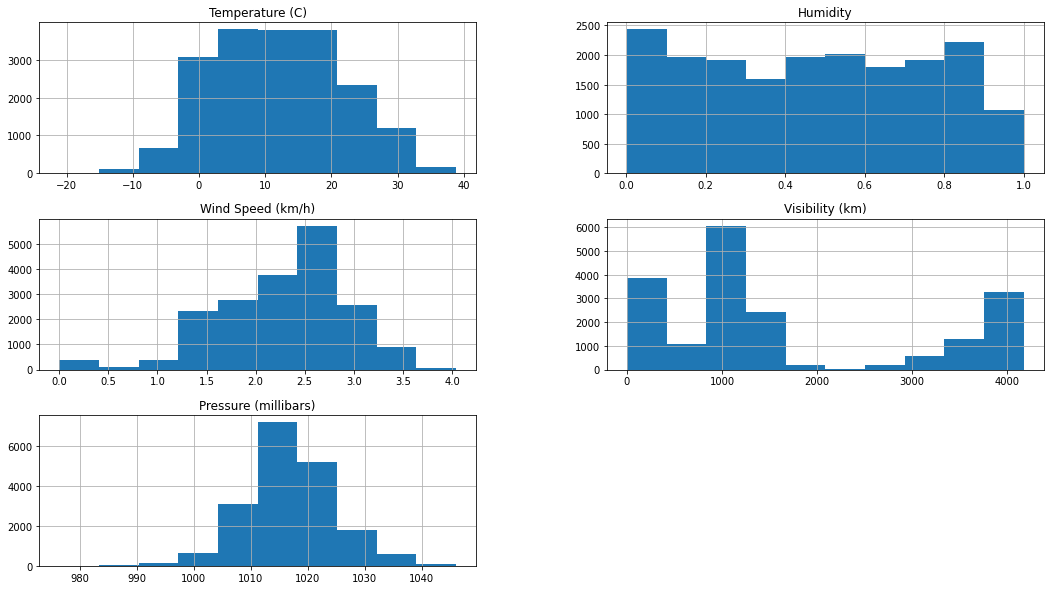

In [159]:
to_standardize_test.hist(figsize=(18,10))

In [160]:
scaler = StandardScaler()
scaler.fit(to_standardize_train)

train_scaled = scaler.transform(to_standardize_train)
test_scaled = scaler.transform(to_standardize_test)
standardized_df_train = pd.DataFrame(train_scaled, columns = to_standardize_train.columns)
standardized_df_test = pd.DataFrame(test_scaled, columns = to_standardize_test.columns)

standardized_df_train

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,-1.024143,0.799973,0.297050,-1.009019,1.007083
1,-1.149611,-0.305471,2.103759,1.662524,-0.064323
2,0.924677,-0.517174,0.286774,1.307987,0.323289
3,-1.498133,0.262558,-0.136535,-1.005307,-0.387548
4,-0.968380,0.407183,0.865507,-0.417573,0.050286
...,...,...,...,...,...
75639,1.646118,-1.145665,-1.121248,-0.158662,0.301397
75640,-0.109272,1.333206,-0.569868,-0.145647,-0.350203
75641,1.258678,-1.174597,0.576714,1.518563,0.163608
75642,-0.514720,1.333206,0.472805,-0.789257,-1.644390


array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>],
       [<AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>]], dtype=object)

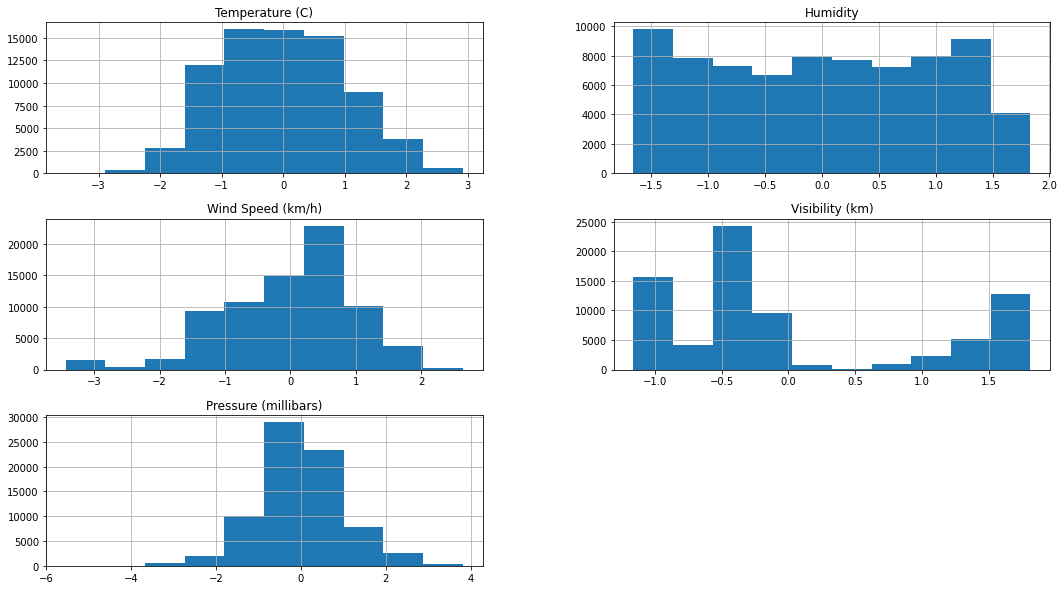

In [161]:
standardized_df_train.hist(figsize=(18,10))

In [162]:
scaler2 = StandardScaler()

scaler2.fit(y_train)
target_train_scaled = scaler2.transform(y_train)
target_test_scaled = scaler2.transform(y_test)

standardized_target_df_train = pd.DataFrame(target_train_scaled, columns = y_train.columns)
standardized_target_df_test = pd.DataFrame(target_test_scaled, columns = y_test.columns)

standardized_target_df_train

,Apparent Temperature (C)
0,-1.102890
1,-1.572191
2,0.925902
3,-1.528583
4,-1.137672
...,...
75639,1.633487
75640,0.001836
75641,1.224406
75642,-0.580118


array([[<AxesSubplot:title={'center':'Apparent Temperature (C)'}>]],
      dtype=object)

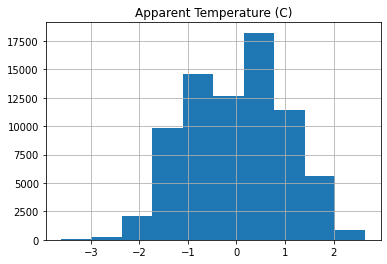

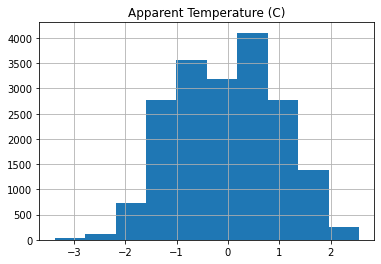

In [163]:
standardized_target_df_train.hist()
standardized_target_df_test.hist()

In [164]:
X_train.drop(columns=to_standardize_train.columns,inplace=True, axis=1)
X_test.drop(columns=to_standardize_test.columns,inplace=True, axis=1)

X_train = standardized_df_train.join(X_train)
X_test = standardized_df_test.join(X_test)

y_train = standardized_target_df_train;
y_test = standardized_target_df_test;

In [165]:
X_train

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Precip Type,Wind Bearing (degrees),x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,...,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,-1.024143,0.799973,0.297050,-1.009019,1.007083,0,81.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.149611,-0.305471,2.103759,1.662524,-0.064323,0,289.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.924677,-0.517174,0.286774,1.307987,0.323289,0,129.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.498133,0.262558,-0.136535,-1.005307,-0.387548,1,291.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.968380,0.407183,0.865507,-0.417573,0.050286,0,18.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75639,1.646118,-1.145665,-1.121248,-0.158662,0.301397,0,53.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75640,-0.109272,1.333206,-0.569868,-0.145647,-0.350203,0,178.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75641,1.258678,-1.174597,0.576714,1.518563,0.163608,0,173.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75642,-0.514720,1.333206,0.472805,-0.789257,-1.644390,0,303.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


V). If necessary, apply feature discretization, and produce a relevant graph to show the discretization

    Feature Discretization means transforming continues variables into descrete once

array([[<AxesSubplot:title={'center':'Wind Bearing (bins)'}>]],
      dtype=object)

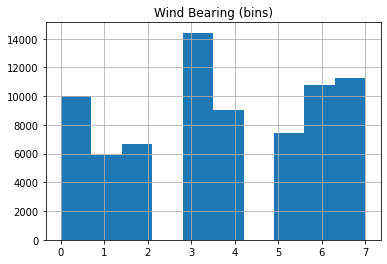

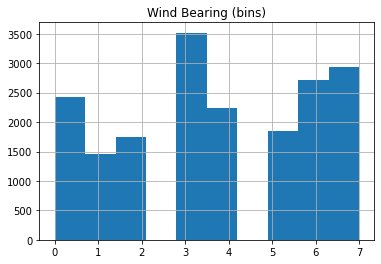

In [166]:
train_data_disc = pd.DataFrame(X_train, columns=['Wind Bearing (degrees)'])
test_data_disc = pd.DataFrame(X_test, columns=['Wind Bearing (degrees)'])

discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans')
discretizer.fit(train_data_disc)

train_discretized = discretizer.transform(train_data_disc)
test_discretized = discretizer.transform(test_data_disc)

train_discretized_df = pd.DataFrame(train_discretized, columns=['Wind Bearing (bins)'])
test_discretized_df = pd.DataFrame(test_discretized, columns=['Wind Bearing (bins)'])

train_discretized_df.hist()
test_discretized_df.hist()

In [167]:
X_train.drop(columns=['Wind Bearing (degrees)'], inplace=True, axis=1)
X_train = train_discretized_df.join(X_train)

X_test.drop(columns=['Wind Bearing (degrees)'], inplace=True, axis=1)
X_test = test_discretized_df.join(X_test)

X_train

,Wind Bearing (bins),Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Precip Type,x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,...,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,1.0,-1.024143,0.799973,0.297050,-1.009019,1.007083,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,-1.149611,-0.305471,2.103759,1.662524,-0.064323,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.924677,-0.517174,0.286774,1.307987,0.323289,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,-1.498133,0.262558,-0.136535,-1.005307,-0.387548,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-0.968380,0.407183,0.865507,-0.417573,0.050286,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75639,1.0,1.646118,-1.145665,-1.121248,-0.158662,0.301397,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75640,4.0,-0.109272,1.333206,-0.569868,-0.145647,-0.350203,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75641,3.0,1.258678,-1.174597,0.576714,1.518563,0.163608,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75642,6.0,-0.514720,1.333206,0.472805,-0.789257,-1.644390,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(b). Perform Feature Engineering by executing the following task:
        
        I). Appropriately use PCA (Principal Component Analysis) or SVD (Singular Value Decomposition) for feature reduction.

In [168]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca_df = pd.DataFrame(data=X_train_pca, columns=X_train.columns)
X_test_pca_df = pd.DataFrame(data=X_test_pca, columns=X_train.columns)

X_train_pca_df.head()

,Wind Bearing (bins),Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Precip Type,x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,...,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,2.765604,1.606963,0.512827,-0.818371,-0.108116,-0.272712,-0.272627,0.628174,-0.455397,-0.277392,...,-0.000123,0.000091,-0.000151,-0.000177,-0.000088,-0.000040,-0.000022,-6.368636e-07,0.000020,-8.771786e-16
1,-2.436337,-0.491680,0.868991,-1.303974,2.263601,-0.091881,0.201726,0.058658,0.213546,0.020866,...,0.909191,-0.078638,-0.039648,-0.000302,-0.012382,-0.006003,-0.003274,1.879713e-06,-0.000087,1.745723e-15
2,1.640134,-1.413848,-0.503464,-0.226345,0.715023,0.610965,-0.797470,-0.112230,-0.164005,0.168269,...,-0.000412,-0.000308,-0.000018,0.000235,-0.000167,-0.000004,-0.000047,1.301972e-05,0.000020,-1.945768e-15
3,-2.236750,1.640156,0.716055,-0.035069,-0.159252,0.170137,1.154128,0.683914,-0.289136,0.290977,...,0.000626,0.000326,0.000072,0.000137,0.000207,-0.000009,0.000025,-1.027174e-05,-0.000017,-5.857450e-16
4,3.666643,0.652828,1.245980,-0.606163,0.455375,-0.223871,0.049751,0.630199,-0.363708,-0.191757,...,-0.000271,0.000397,0.000118,0.000014,0.000021,-0.000045,-0.000029,7.567205e-06,-0.000003,-1.015956e-15


In [169]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([4.77137533e-01, 1.79536127e-01, 1.00538045e-01, 8.01655464e-02,
       7.09112676e-02, 2.68299233e-02, 2.52998390e-02, 1.59341804e-02,
       1.04258218e-02, 6.20690909e-03, 4.90073612e-03, 6.95106843e-04,
       4.90504148e-04, 3.88619719e-04, 1.04302520e-04, 6.74753922e-05,
       6.01318407e-05, 5.03513080e-05, 4.33471819e-05, 3.71349886e-05,
       3.24830570e-05, 2.96320790e-05, 2.95403970e-05, 2.87054761e-05,
       1.96640190e-05, 1.16093738e-05, 1.06717724e-05, 7.38035679e-06,
       3.70651772e-06, 1.33134769e-06, 1.18666362e-06, 1.18648542e-06,
       1.62622335e-31])

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

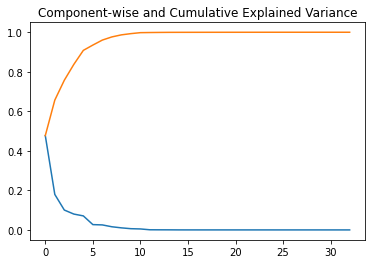

In [170]:
plt.plot(range(33), pca.explained_variance_ratio_)
plt.plot(range(33), np.cumsum(pca.explained_variance_ratio_)) # Cummualtive frequency graph
plt.title("Component-wise and Cumulative Explained Variance")

In [171]:
arr = explained_variance_ratio
sum=0
for i in range(0,10):
    sum += arr[i]
print('Sum: ', str(sum))

Sum:  0.9929851923896174


From the above output, you can observe that we can reduce (project) 33 dimensions into 10 dimensions with a loss only 1% of information.

In [172]:
pca = PCA(n_components=10)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca.shape

(75644, 10)

The critical point here is that the 7 columns(components) are actually 7 new columns, determined by the algorithm behind sklearn.decomposition’s PCA module. Because PCA not entirely drop the columns, but project the data into eigon vecter space dimensions and removing the non signinficant overlapping dimensions.

II). Identify significant and independent features using appropriate techniques.

        Correlation Matrix with heat map

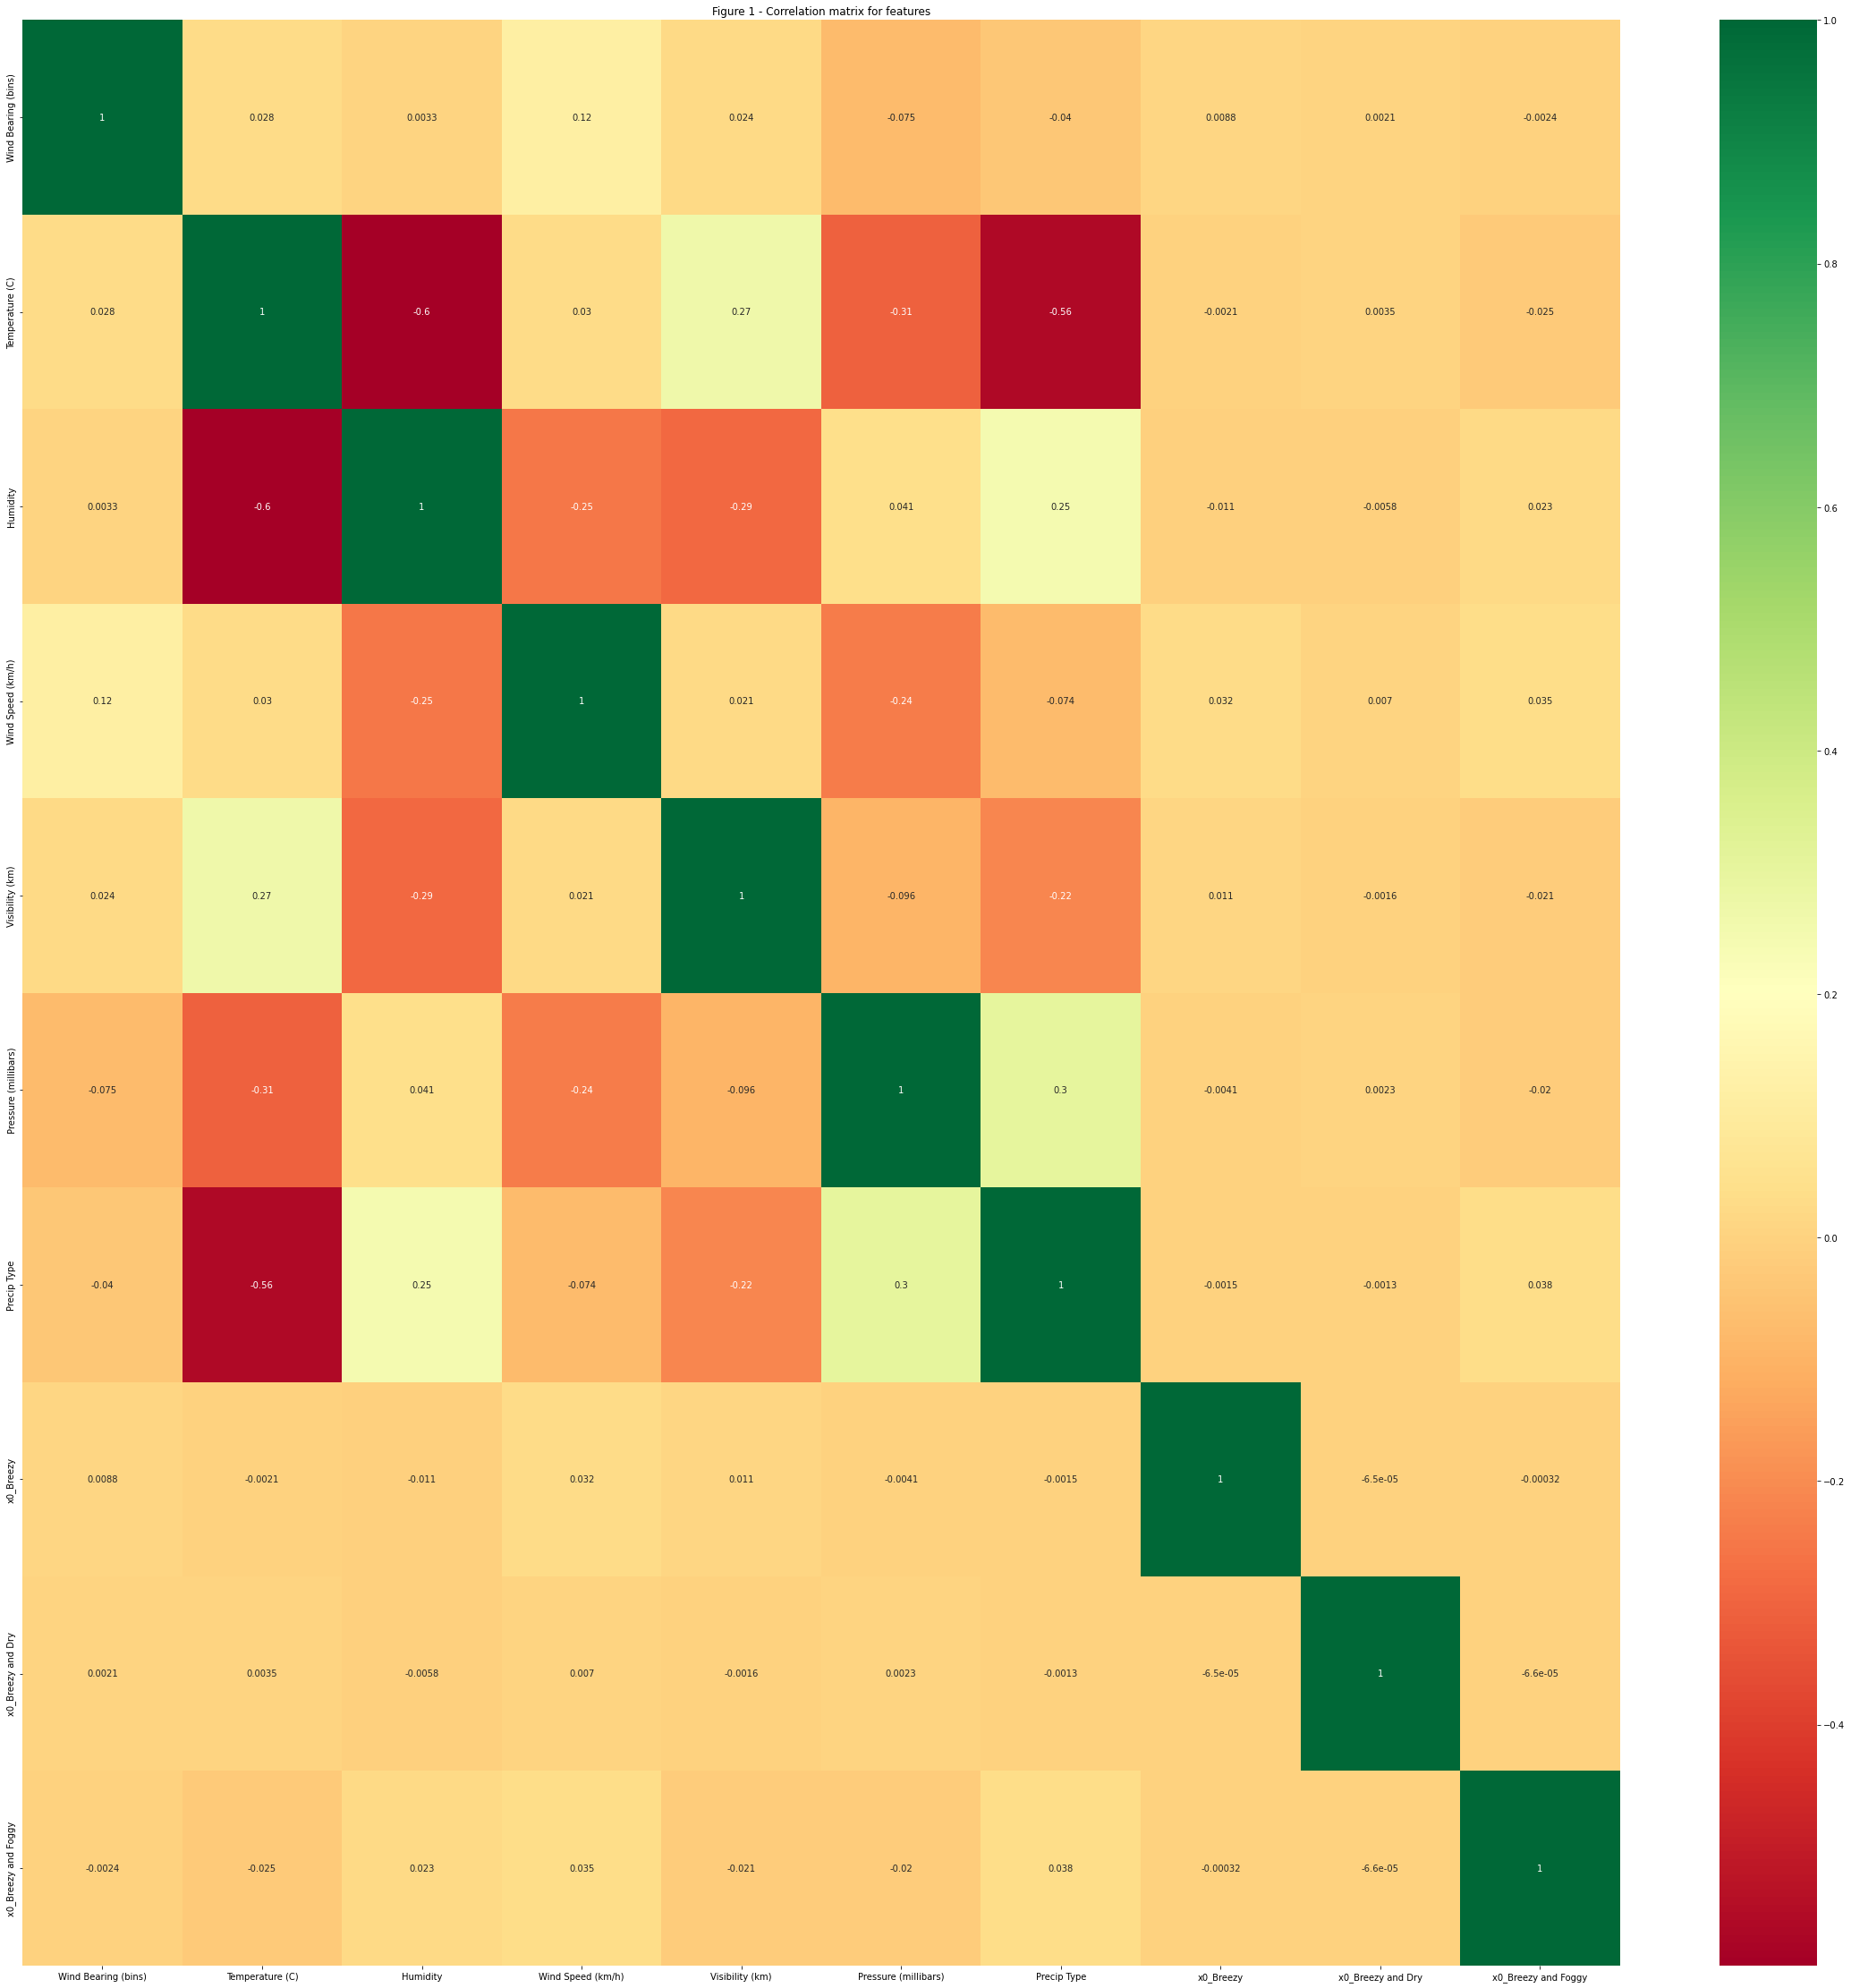

In [173]:
coorelation_mat = X_train.iloc[:,:10].corr()
plt.figure(figsize=(40,40))

sns.heatmap(coorelation_mat, annot=True, cmap="RdYlGn")
plt.title('Figure 1 - Correlation matrix for features')
plt.show()

High Corelated features

Humidity vs Temparature

temperature and visibility

humidity and visibility

foggy and visibility

precip type and temparature

Use case:Is there a relationship between humidity and temperature - Yes High negative corelation

(c). Modeling:
        (Training Dataset to Test Dataset is 0.8 to 0.2 ratio) Linear Regression Model

        We already splitted the dataset

        Wthiout PCA - All 33 features

In [204]:
#Implementing Linear Regression
from sklearn import linear_model
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X_train_pca,y_train)

In [205]:
predictions = lm2.predict(X_test_pca)
y_hat_pca = pd.DataFrame(predictions, columns=["predicted"])
print(y_hat_pca.head(10)) #print predictions for first ten values

   predicted
0   0.955536
1   1.279345
2  -0.936585
3   0.606929
4   0.708338
5  -0.378360
6  -0.668482
7   2.133830
8  -0.205544
9  -0.984698


In [206]:
 #Calcualting MSE of y_hat and y
from sklearn.metrics import mean_squared_error

mse_for_pca=mean_squared_error(y_test, y_hat_pca)
mse_for_pca

0.01038847365052647

In [207]:
#Percentage of explained variance of the predictions
score_pca=lm2.score(X_test_pca,y_test)
score_pca

0.989556317812872

In [208]:
print(lm2.coef_)

[[-0.02010702 -0.56657374 -0.19354794  0.2449955  -0.42687686 -0.13969287
  -0.58927519  0.06593572 -0.01248809  0.13955703]]


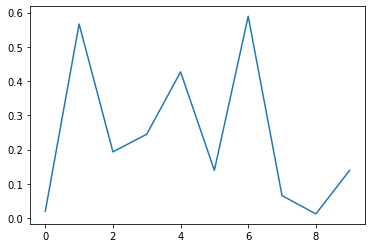

In [209]:
abs_coef=abs(lm2.coef_)
plt.plot(abs_coef[0])

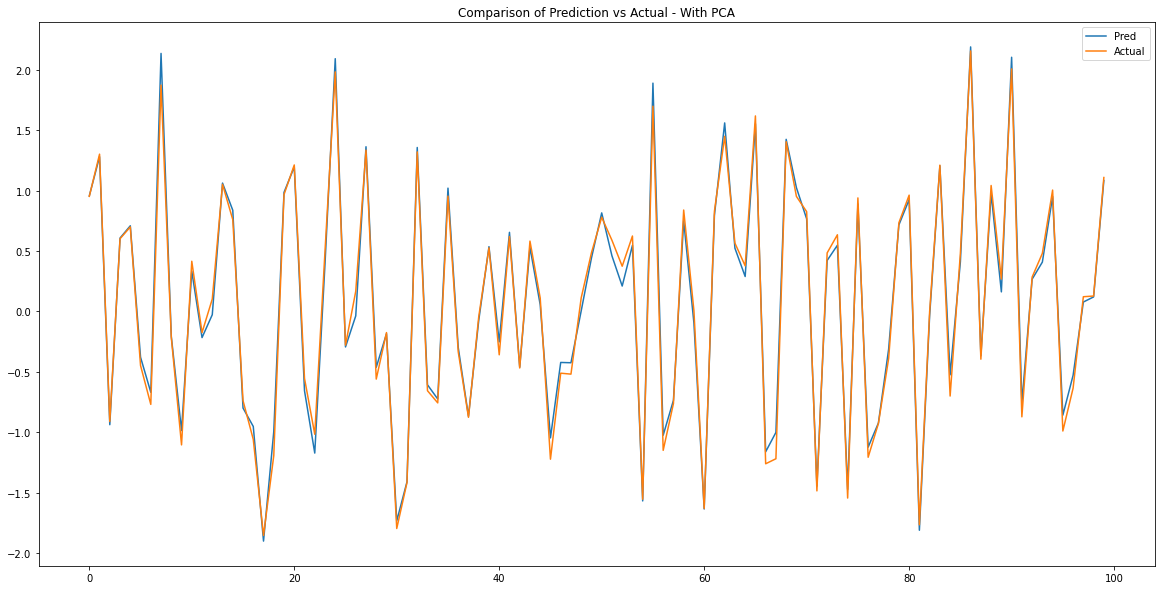

In [210]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

# Limiting the data set to 100 rows for more clearence
plt.plot(y_hat_pca[:100], label = "Pred")
plt.plot(y_test[:100], label = "Actual")

plt.title('Comparison of Prediction vs Actual - With PCA')
plt.legend()
plt.show()

In [211]:
# K-fold cross validation
# Necessary imports: 

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [212]:
X_combined = np.r_[X_train_pca, X_test_pca]
y_combined = np.r_[y_train, y_test]

In [213]:
# Perform 6-fold cross validation
scores = cross_val_score(lm2, X_combined, y_combined, cv=6)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.98960546 0.98949542 0.98934393 0.98957258 0.98974516 0.98945312]


In [214]:
predictions = cross_val_predict(model2, X_combined, y_combined, cv=6)
accuracy = metrics.r2_score(y_test, y_hat_pca)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.989556317812872
